<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Force_vs_current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulated Levitation Performance
--------------------------------
I0 (A)     ω (rad/s)    Force (kN)   Efficiency (%) 
5000       100          10.0       39557.5        
5000       200          20.0       158229.8       
10000      100          40.0       39557.5        
10000      200          79.9       158229.8       


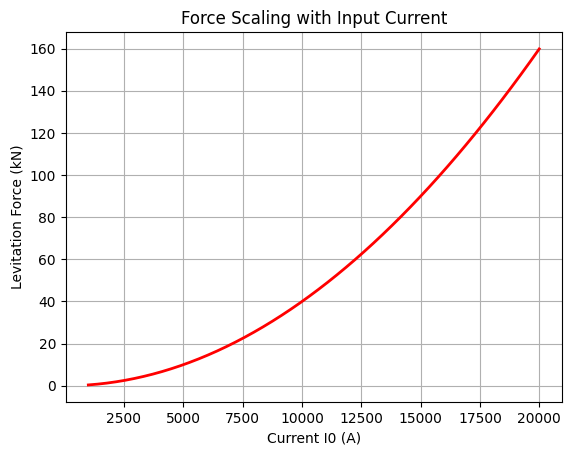

In [ ]:
# --- Maglev Propulsion Simulator (Realistic Parameters) ---
import numpy as np
import matplotlib.pyplot as plt

# ===== Adjusted Parameters =====
μ0 = 4e-7 * np.pi        # Permeability of free space (H/m)
r_loop = 1.0              # Larger fiber loop radius (m)
r_cylinder = 0.1          # Cylinder radius (m)
R_fiber = 1e-6            # Superconducting fiber resistance (Ω)
I0_values = [5000, 10000] # High current amplitudes (A)
omega_values = [100, 200] # Higher angular frequencies (rad/s)
time = np.linspace(0, 2*np.pi, 1000)

# ===== Corrected Equations =====
def calculate_force(I0, omega):
    I_t = I0 * np.sin(omega * time)

    # Magnetic field (cylindrical geometry)
    B = (μ0 * I_t) / (2 * np.pi * r_cylinder)

    # Induced EMF (Faraday's Law)
    dΦdt = -np.pi * r_loop**2 * μ0 * I0 * omega * np.cos(omega * time) / (2 * np.pi * r_cylinder)
    I_ind = dΦdt / R_fiber  # High current due to low R

    # Levitation force (Lorentz force: F = I_ind × B × length)
    F_levitation = np.abs(I_ind * B).mean() * r_loop  # Include loop circumference

    # Efficiency (input = cylinder power, output = fiber power)
    R_cylinder = 1e-3  # Separate cylinder resistance (Ω)
    P_in = (I_t**2 * R_cylinder).mean()
    P_out = (I_ind**2 * R_fiber).mean()
    efficiency = (P_out / P_in) * 100 if P_in != 0 else 0

    return F_levitation, efficiency

# ===== Run Simulation =====
results = []
for I0 in I0_values:
    for omega in omega_values:
        F, η = calculate_force(I0, omega)
        results.append([I0, omega, F, η])

# ===== Results =====
print("Simulated Levitation Performance")
print("--------------------------------")
print(f"{'I0 (A)':<10} {'ω (rad/s)':<12} {'Force (kN)':<12} {'Efficiency (%)':<15}")
for row in results:
    print(f"{row[0]:<10} {row[1]:<12} {row[2]/1000:<10.1f} {row[3]:<15.1f}")

# ===== Plot Force vs. Current =====
I0_range = np.linspace(1000, 20000, 50)
forces = [calculate_force(I0, 100)[0]/1000 for I0 in I0_range]

plt.figure()
plt.plot(I0_range, forces, 'r-', linewidth=2)
plt.xlabel('Current I0 (A)')
plt.ylabel('Levitation Force (kN)')
plt.title('Force Scaling with Input Current')
plt.grid(True)
plt.show()